# Introduction to Artificial Neural Networks with Keras

## Building an Image Classifier using the sequential API

 In this chapter we will tackle Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

### Using Keras to Load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype # integer of 8 bits

dtype('uint8')

Note that we have a training set and test set but we don't have a validation set. Let's create one by sampling the training set. Moreover, we are going to use Gradient descent to train our neural network, therefore, it's important to scale the input features. 

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the model using the Sequential API

Now let's build the Neural Network:

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,  activation="softmax"))

In [9]:
# Instead of adding the layers one by one as we just did, you can pass a list of
# layers when creating the Sequential model:

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [10]:
model.summarSequentialy()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


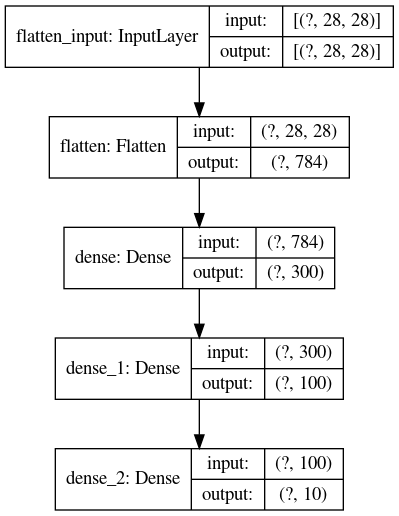

In [11]:
# Plot the model architecture
keras.utils.plot_model(model, show_shapes=True)

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

In [12]:
# Get a list of the layers in the model
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
# Access all the parameters of a model
weights, biases = hidden1.get_weights()
weights

array([[ 0.06668122, -0.02982721,  0.06021455, ...,  0.0612593 ,
         0.04403561,  0.06837162],
       [-0.01898373, -0.04996358, -0.06613268, ..., -0.04377874,
         0.06491722, -0.04242386],
       [-0.06927819, -0.04968162,  0.05137651, ...,  0.0678968 ,
        -0.06240705, -0.04973978],
       ...,
       [ 0.03375659, -0.06517813,  0.00086765, ...,  0.0381474 ,
         0.02390073,  0.00695255],
       [ 0.01687363,  0.06749491, -0.04286739, ...,  0.05336581,
        -0.00942497,  0.01226954],
       [-0.00186446,  0.06952076,  0.0513103 , ...,  0.01412558,
         0.01582862, -0.07193509]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

#### Compiling the model

After a model is created, you must call its *compile()* method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [19]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

# Default learning Rate of "sgd" optimizer = 0.01

#### training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=30, validation_data=(X_valid, y_valid))

# Default Batch Size = 32 instances, which, in this case means 
# that an epoch will run 1719 batches of 32 pictures. 

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7232 - accuracy: 0.7635 - val_loss: 0.5125 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8298 - val_loss: 0.4392 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8455 - val_loss: 0.4445 - val_accuracy: 0.8406
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4150 - accuracy: 0.8538 - val_loss: 0.5730 - val_accuracy: 0.7824
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3934 - accuracy: 0.8609 - val_loss: 0.3945 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8676 - val_loss: 0.3747 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8722 - val_loss: 0.3725 - val_accuracy:

The *fit()* method returns a History object containing the training parameters (*history.params*), the list of epochs it went through (*history.epoch*), and most importantly a dictionary (*history.history*) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its *plot()* method, you get the learning curves:

In [21]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1]
plt.show()

<Figure size 800x500 with 1 Axes>

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

#### Evaluate the model

To check the general performance of your model, run it against the test set with *evaluate()*:

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 72.1890 - accuracy: 0.8362


[72.18897247314453, 0.8361999988555908]

#### Using the model to make predictions

In [26]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [27]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

In [28]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

### Building a Regression MLP using the sequential API

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Here, we are using the California housing dataset from chapter 02
# except that this one does not contain the categorical variable "ocean_proximity"
# and there is no missing value
housing = fetch_california_housing()

In [31]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [32]:
# Since we are using SGD, we must standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### Using the Sequential API

In [33]:
X_train.shape

(11610, 8)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5272 - val_loss: 0.5005
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5935 - val_loss: 0.4280
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.4922 - val_loss: 0.4287
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4165 - val_loss: 0.3972
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4026 - val_loss: 0.3729
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3914 - val_loss: 0.3772
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 0.3600
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3836 - val_loss: 0.3618
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3552
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3744 - val_loss: 0.3599

In [35]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 879us/step - loss: 0.3678


In [36]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(y_test[:5])
print(y_pred.reshape(5))

[5.00001 1.313   5.00001 0.769   2.453  ]
[1.1346608 1.5527108 4.096456  1.070293  2.7317612]


## Building complex models using the functional API

So far, we've developed our models using the **Sequential API**, where we stack layer by layer passing the input shape, number of neurons, loss function, activation function, optimizers and evaluation metric.

However, there are other options on building your own neural network with a custom architecture. Now let's talk about the **Functional API**. 

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. (Heng-Tze Cheng et al., “Wide & Deep Learning for Recommender Systems,” Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7–10.)

![wide_deep_nn](./images/ch10_wide_deep_nn.png)

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short/wide path).

Let's build such a NN using the functional approach:

In [49]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Notice that we indicate which layer will be the input of another calling it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.

Once you have built the Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions.

In [50]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9400 - val_loss: 0.7899
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9135 - val_loss: 0.6666
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8303 - val_loss: 0.6145
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7631 - val_loss: 0.6024
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6610 - val_loss: 0.5710
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6249 - val_loss: 0.5590
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5883 - val_loss: 0.5449
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5736 - val_loss: 0.5333
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5568 - val_loss: 0.5215
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5137

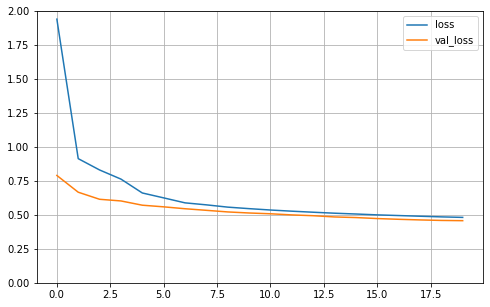

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # Set the vertical range to [0-1]
plt.show()

### Functional API: Multiple inputs

Everything works fine until now, but what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path (see Figure 10-15)? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

Let's try to implement the following NN archictecture with the Keras Functional API:

![multiple_inputs](./images/ch10_multiple_inputs.png)

In [55]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Note it does not need to pass an argument like in the other layers
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Now we can compile the model as usual, but when we call the *fit()* method, instead of passing a single input matrix *X_train*, we must pass a pair of matrices *(X_train_A, X_train_B)*: one per input. The same is true for *X_valid*, and also for *X_test* and *X_new* when you call *evaluate()* or *predict()*:

In [57]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3400 - val_loss: 0.9399
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8342 - val_loss: 0.6865
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7072 - val_loss: 0.6270
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6624 - val_loss: 0.5962
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6324 - val_loss: 0.5718
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6089 - val_loss: 0.5532
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5883 - val_loss: 0.5365
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5710 - val_loss: 0.5207
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5562 - val_loss: 0.5081
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5447 - val_loss: 0.5015

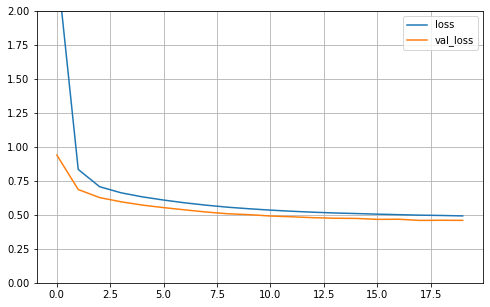

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # Set the vertical range to [0-1]
plt.show()

In [58]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4833


In [65]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[1.1964214],
       [1.6729321],
       [3.508959 ]], dtype=float32)

### Functional API: Multiple inputs and outputs

There are many use cases in which you may want to have multiple output

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

![multiple_inputs_outputs](./images/ch10_multiple_inputs_outputs.png)

In [67]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Note it does not need to pass an argument like in the other layers
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [68]:
# Each output will need its own loss function
# Assign more weight to the loss of the main output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [69]:
history = model.fit(x=[X_train_A, X_train_B], y=[y_train, y_train], epochs=20,  
                   validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0165 - main_output_loss: 0.8830 - aux_output_loss: 2.2177 - val_loss: 0.5566 - val_main_output_loss: 0.4949 - val_aux_output_loss: 1.1127
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5991 - main_output_loss: 0.5456 - aux_output_loss: 1.0809 - val_loss: 0.5223 - val_main_output_loss: 0.4764 - val_aux_output_loss: 0.9359
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6692 - main_output_loss: 0.6412 - aux_output_loss: 0.9214 - val_loss: 0.4770 - val_main_output_loss: 0.4388 - val_aux_output_loss: 0.8201
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5152 - main_output_loss: 0.4842 - aux_output_loss: 0.7942 - val_loss: 0.4621 - val_main_output_loss: 0.4335 - val_aux_output_loss: 0.7189
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4915 - main_output_loss: 0.4650 - aux_output_loss: 0.7303 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [70]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3786 - main_output_loss: 0.3641 - aux_output_loss: 0.5089


Similarly, the *predict()* method will return predictions for each output:

In [75]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[1.0232872]
 [1.5211403]
 [4.3539743]] [[1.2783371]
 [1.2839859]
 [5.319301 ]]


## Using the Subclassing API to build Dynamic Models

There is one last that way you can build Keras models. Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the *Model* class, create the layers you need in the constructor, and use them to perform the computations you want in the *call()* method. For example, if you want to implement the neural network we just built using the functional API, do as follows:

In [76]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()